# Note to reader

This is V1.1 of the code for Part 2 of assignment 1 for QBUS2820

---------------

# Brief

Find the most appropriate predictive models of your choice to predict NBA player salary from performance statistics.

As a consultant working for a sports data analytics company, the NBA league approached you to develop predictive models to predict NBA salaries based on state-of-art techniques from predictive analytics. To enable this task, you were provided with a dataset containing highly detailed performance of the NBA players. The response is the SALARY($Millions) column in the dataset.

As part of the contract, you need to write a report according to the details below. The client will use a test set to evaluate your work, using RSME as the scoring metric

Your report must include the validation scores for at least five different sets of predictions, including your final 2 best models. You need to make a submission on Kaggle to get each validation score. You need to present your final 2 best models in details. For the other three additional methods, only brief explanations of the models are needed.

# Explanation of Acronym

Glossary very helpful https://stats.nba.com/help/glossary/

**PER** - Personal efficiency rating

**TS** - True shooting percentage

**ORB** - Offensive rebounds

**DRB** - Defensive rebounds

**TRB** - Total rebounds

**AST** - Assists

**STL** - Steals

**BLK** - Blocks

**TOV** - Turnover percentage (per possession)

**USG** - Usage percentage

**ORtg** - Offensive rating

**DRtg** - Defensive rating

**OWS** - Offensive win shares

**DWS** - Defensive win shares

**WS** - Win shares


----------------

# Table of Contents

1. Relevant Packages
2. Importing Data
3. Variable and lists
4. Data Cleaning
5. Exploratory Data Analysis

## Relevant Packages

In [1]:
#pandas used for importing data in a dataframe that can be examined
import pandas as pd

#numpy used for preforming various calculations with dataframes
import numpy as np

#random used for random
import random as random

#statsmodels used for statistical formulas like OLS
import statsmodels.api as sm
import statsmodels.formula.api as smf

#matplotlib and seaborn both used for graphing data
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
#read_csv is used for .csv
Raw_Train = pd.read_csv('p2_train.csv') 

Raw_Train.head(10) #note that the ... column is not shown for space saving reasons

,Train_ID,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,1,2.288205,SG,Orlando Magic,21,76,1503,10.3,0.533,2.4,...,11.6,1.1,0.3,14.3,19.7,101,111,0.6,0.8,1.4
1,2,2.139000,PG,Washington Wizards,29,52,1114,12.5,0.530,1.0,...,13.0,0.8,0.0,11.0,23.8,102,113,0.6,0.3,1.0
2,3,8.000000,SG,New York Knicks,28,73,2552,16.0,0.574,1.4,...,16.9,0.7,0.1,11.2,23.3,110,112,4.3,1.0,5.3
3,4,5.158539,SG,Memphis Grizzlies,32,55,1278,15.6,0.531,7.3,...,11.7,3.8,1.2,16.2,20.1,102,101,0.5,2.1,2.7
4,5,3.333333,PF,Atlanta Hawks,25,80,1482,15.3,0.559,4.9,...,8.9,1.0,0.4,10.3,23.5,105,108,1.3,1.2,2.6
5,6,3.272091,C,Detroit Pistons,20,81,2619,22.6,0.599,17.5,...,2.2,2.0,4.0,10.7,16.7,121,104,6.4,3.5,9.9
6,7,17.120106,SF,Indiana Pacers,23,80,2898,20.1,0.555,2.6,...,17.9,2.7,0.6,12.5,28.3,107,97,4.4,6.4,10.8
7,8,1.252440,SF,Detroit Pistons,22,43,395,6.7,0.460,3.2,...,4.3,1.1,0.2,9.4,15.4,93,108,-0.2,0.3,0.2
8,9,3.034356,SG,Charlotte Hornets,21,78,1538,13.4,0.522,2.1,...,11.8,1.8,1.4,8.7,20.1,106,105,1.4,1.8,3.3
9,10,12.404495,PG,Houston Rockets,26,62,2222,19.0,0.554,1.9,...,38.2,2.2,0.3,16.9,22.7,113,110,4.8,1.5,6.3


In [3]:
#checking for empty cells
if Raw_Train.empty:
    print('DataFrame is empty!')
else:
    print('Good to go!')

Good to go!


### Notes

There are no empty or incorrect observations/cells so we can begin with our EDA. Data cleaning is not necessary as the data seems to be of acceptable quality


Moreover, no changes to the names or values of observations were made

In [4]:
Train = Raw_Train

## Variables and List

Created some variables and list to prepare for subsequent coding. Probably not best method to place it here but meh. Open to suggestions

In [5]:
#use this list for the scatterplot matrix and other big functions
Allvariables = [
    'SALARY',
    'POSITION',
    'TEAM',
    'Age',
    'Games',
    'Minutes',
    'PER',
    'TS',
    'ORB',
    'DRB',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'USG',
    'ORtg',
    'DRtg',
    'OWS',
    'DWS',
    'WS',
]

## Exploratory Data Analysis

Need to make sure our data is acceptable for OLS regression and KNN.

### Scatterplot Matrix

Download the image to see it properly. Check the discord for the jpeg format because you may open the png copy which removes the white background

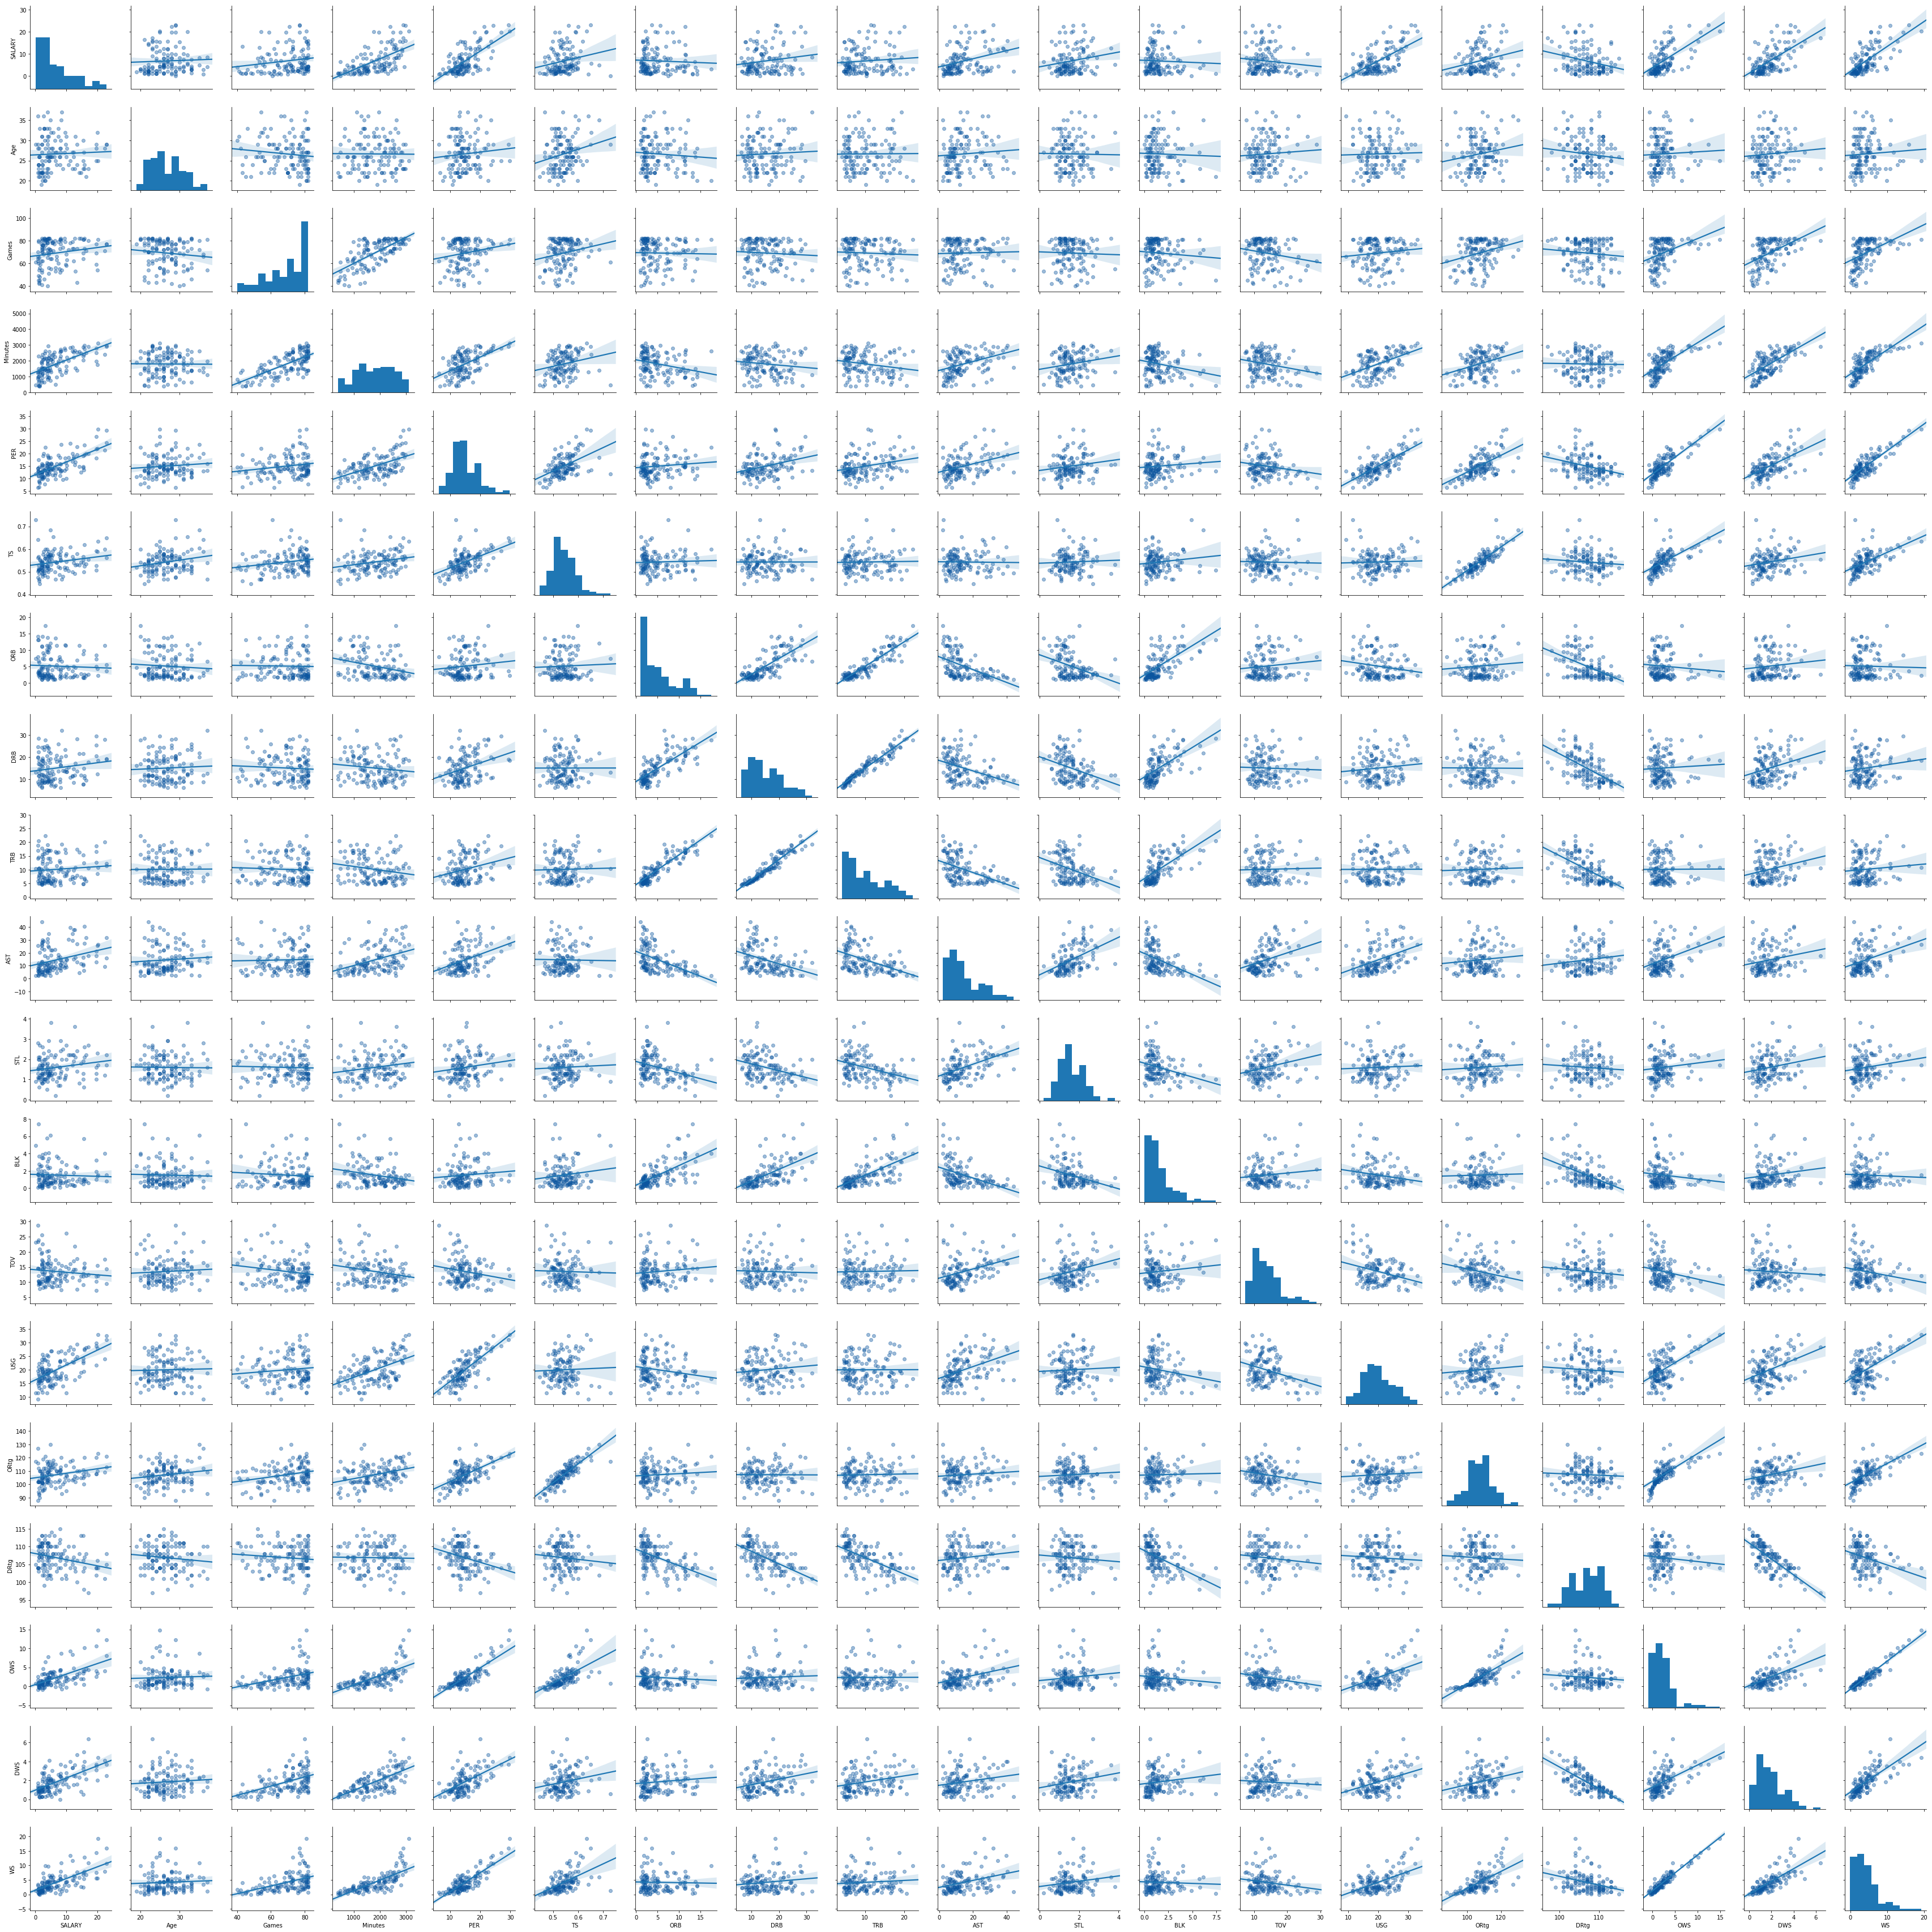

In [6]:
Scatterplot_Matrix_1 = sns.pairplot(Train[Allvariables], 
                                    kind= 'reg', 
                                    plot_kws = {'scatter_kws' :{'color': sns.color_palette('Blues')[-1],
                                    'alpha': 0.4}})

plt.tight_layout()
plt.show()

### Graphs for the response variable (SALARY)

The boxplot shows an alright distribution for salary. We expect to have some high salary for star players. Furthermore, the pattern plot shows no obvious pattern so we can say no other variable is affecting salary.

If we do create a OLS model, we could use a log model to nullify the outliers

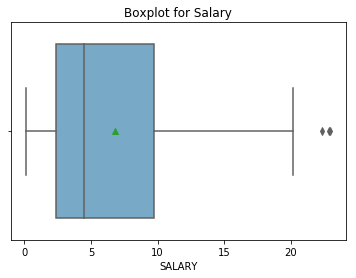

In [7]:
#boxplot
Boxplot_Salary = sns.boxplot(x= Train['SALARY'], data= Train, palette='Blues', showmeans=True)

plt.title('Boxplot for Salary')

plt.show()

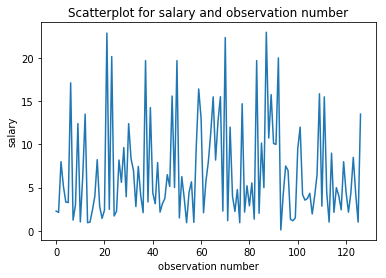

In [8]:
#patternplot
Train['SALARY'].plot()

plt.title('Scatterplot for salary and observation number')
plt.xlabel('observation number')
plt.ylabel('salary')

plt.show()

Text(0.5,1,' Correlation Heatmap Matrix for all variables')

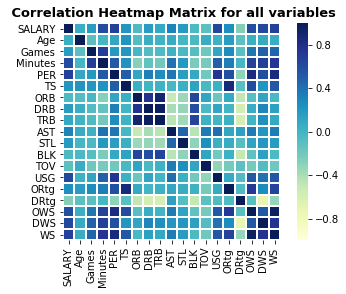

In [32]:
Heatmap_Matrix_1 = sns.heatmap(Train[Allvariables].corr(), 
            vmax= 1, 
            vmin= -1, 
            center= 0,
            square= True,
            linewidths=1,
            annot= False,
            #ax= Heatmap_Matrix_1, 
            cmap= 'YlGnBu')

Heatmap_Matrix_1.set_title(' Correlation Heatmap Matrix for all variables', fontweight= 'bold', fontsize= 13)



### Notes

Naturally, we should try and do some OLS with Salary VS [Variable here], the most promising are ORB, DRB, TRB and OWS, DWS and WS. So we should look at them a bit more closely and follow up with model selection (forward/backward selection).

Justin raised some good points that more time played = higher/defensive defensive score so that's a factor we have to look into.

## Old Code and stuff

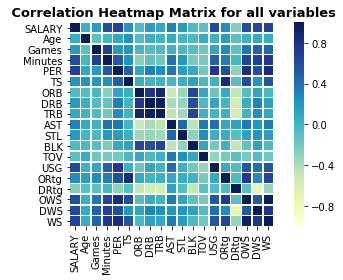

In [23]:
#heatmap matrix https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, Heatmap_Matrix_1 = plt.subplots()
sns.heatmap(Train[Allvariables].corr(), 
            vmax= 1, 
            vmin= -1, 
            center= 0,
            square= True,
            linewidths=.5,
            annot= False, #don't set true as there are too many variables
            ax= Heatmap_Matrix_1, 
            cmap= 'YlGnBu')

Heatmap_Matrix_1.set_title(' Correlation Heatmap Matrix for all variables', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()